# Import the necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import pathlib
import os
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [81]:
data = pd.read_csv('../data/creditcardmarketing.csv')
data

,ID,Offer_Accepted,Reward,Mail,Income,Accounts,Protection,Rating,Cards,Homes,Family,Home_Owner,Q1,Q2,Q3,Q4,Salary
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


## Data Cleaning

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18000 non-null  int64  
 1   Offer_Accepted  18000 non-null  object 
 2   Reward          18000 non-null  object 
 3   Mail            18000 non-null  object 
 4   Income          18000 non-null  object 
 5   Accounts        18000 non-null  int64  
 6   Protection      18000 non-null  object 
 7   Rating          18000 non-null  object 
 8   Cards           18000 non-null  int64  
 9   Homes           18000 non-null  int64  
 10  Family          18000 non-null  int64  
 11  Home_Owner      18000 non-null  object 
 12  Q1              17976 non-null  float64
 13  Q2              17976 non-null  float64
 14  Q3              17976 non-null  float64
 15  Q4              17976 non-null  float64
 16  Salary          17976 non-null  float64
dtypes: float64(5), int64(5), object

In [83]:
data.shape

(18000, 17)

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Accounts,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Cards,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Family,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Salary,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [69]:
clean_data = data.dropna()
clean_data.shape

(17976, 17)

In [70]:
data = data.drop_duplicates()
data.shape

(18000, 17)

In [71]:
data.isna().sum()

ID                 0
Offer_Accepted     0
Reward             0
Mail               0
Income             0
Accounts           0
Protection         0
Rating             0
Cards              0
Homes              0
Family             0
Home_Owner         0
Q1                24
Q2                24
Q3                24
Q4                24
Salary            24
dtype: int64

In [72]:
null_rows = data[data.isnull().any(axis=1)].apply(lambda x: x.isnull().sum(), axis=1).sort_values(ascending=False)
null_rows

323      5
3070     5
15933    5
15707    5
14698    5
14666    5
13470    5
13313    5
12945    5
12559    5
12479    5
10860    5
10039    5
8634     5
8151     5
7864     5
7787     5
6932     5
5689     5
5677     5
5083     5
3789     5
3108     5
17104    5
dtype: int64

## Conclusions

We can appreciate how a small percentage of the data present null values, so we can drop them without affecting the analysis.

In [85]:
data = data.dropna()
data = data.drop_duplicates()
data.shape

data.isna().sum()

ID                0
Offer_Accepted    0
Reward            0
Mail              0
Income            0
Accounts          0
Protection        0
Rating            0
Cards             0
Homes             0
Family            0
Home_Owner        0
Q1                0
Q2                0
Q3                0
Q4                0
Salary            0
dtype: int64

In [86]:
data.columns =  data.columns.str.lower().str.replace(' ', '_').str.replace('#', 'number')
data.columns

Index(['id', 'offer_accepted', 'reward', 'mail', 'income', 'accounts',
       'protection', 'rating', 'cards', 'homes', 'family', 'home_owner', 'q1',
       'q2', 'q3', 'q4', 'salary'],
      dtype='object')

In [87]:
data.isna().sum()
data

,id,offer_accepted,reward,mail,income,accounts,protection,rating,cards,homes,family,home_owner,q1,q2,q3,q4,salary
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [88]:
for colum in data.columns:
    print(data[colum].value_counts(), '\n')

1        1
11996    1
12002    1
12001    1
12000    1
        ..
6006     1
6007     1
6008     1
6009     1
18000    1
Name: id, Length: 17976, dtype: int64 

No     16955
Yes     1021
Name: offer_accepted, dtype: int64 

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64 

Postcard    9134
Letter      8842
Name: mail, dtype: int64 

Medium    9002
High      4519
Low       4455
Name: income, dtype: int64 

1    13674
2     4007
3      295
Name: accounts, dtype: int64 

No     15300
Yes     2676
Name: protection, dtype: int64 

High      6064
Medium    5964
Low       5948
Name: rating, dtype: int64 

2    7933
1    6147
3    3381
4     515
Name: cards, dtype: int64 

1    14502
2     3289
3      185
Name: homes, dtype: int64 

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: family, dtype: int64 

Yes    11636
No      6340
Name: home_owner, dtype: int64 

1127.00    17
1070.00    16
1036.00    16
1078.50    16
1053.50 

## Analize the offer acceptance rate

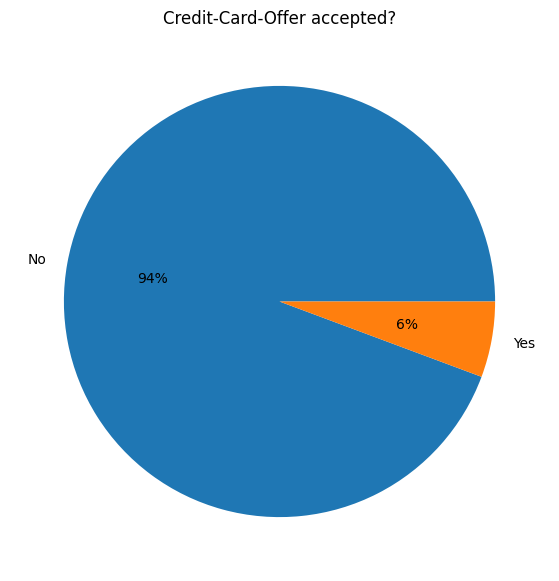

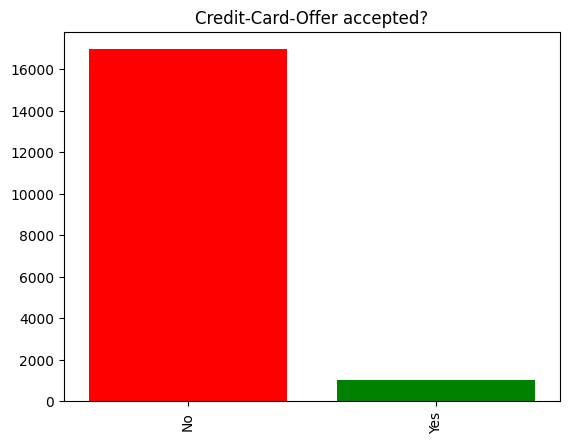

In [74]:
plt.figure(figsize=(9,7))
plt.pie(data['Offer_Accepted'].value_counts(), autopct='%1.0f%%', labels=['No', 'Yes'])
plt.title('Credit-Card-Offer accepted?')
plt.show()

data['Offer_Accepted'].value_counts(normalize=True).plot(kind='bar')
plt.bar([0,1], data['Offer_Accepted'].value_counts(), color=['red', 'green'])
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Credit-Card-Offer accepted?')
plt.show()

## Show information about people who accepted or denied the offer

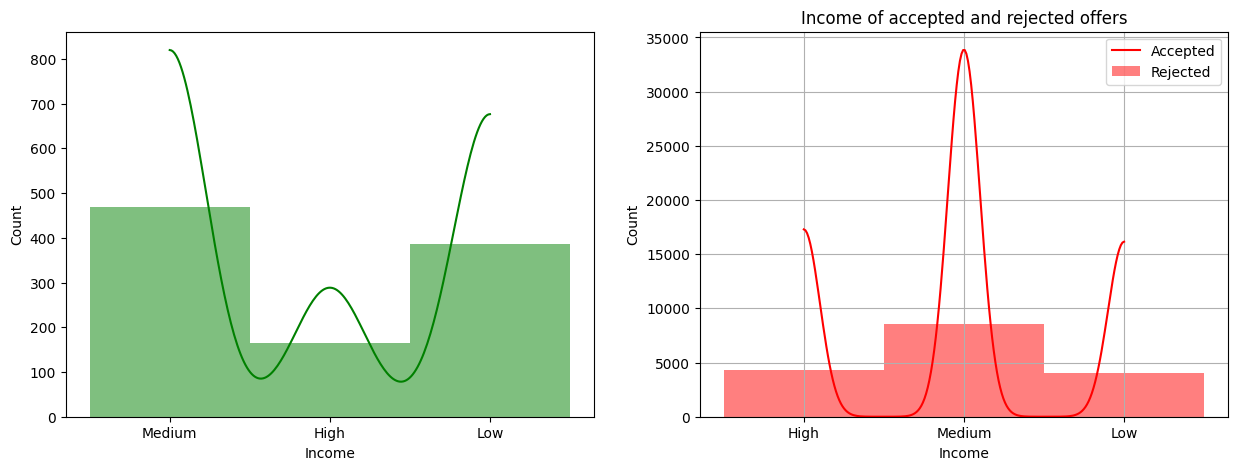

In [75]:
accepted = data[data['Offer_Accepted'] == 'Yes']
rejected = data[data['Offer_Accepted'] == 'No']

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(accepted['Income'], ax=ax[0], color='green', kde=True, linewidth=0)
sns.histplot(rejected['Income'], ax=ax[1], color='red', kde=True, linewidth=0)
plt.legend(['Accepted', 'Rejected'])
plt.title('Income of accepted and rejected offers')
plt.grid()
plt.show()

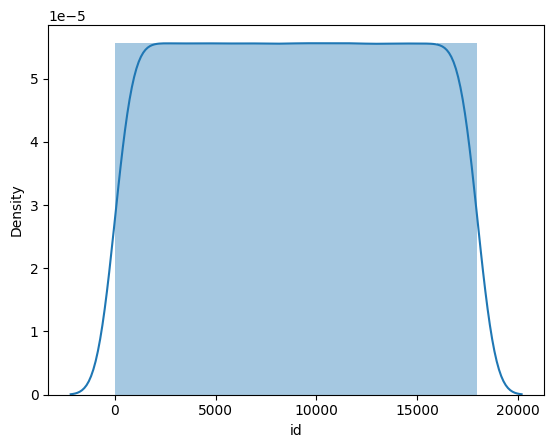

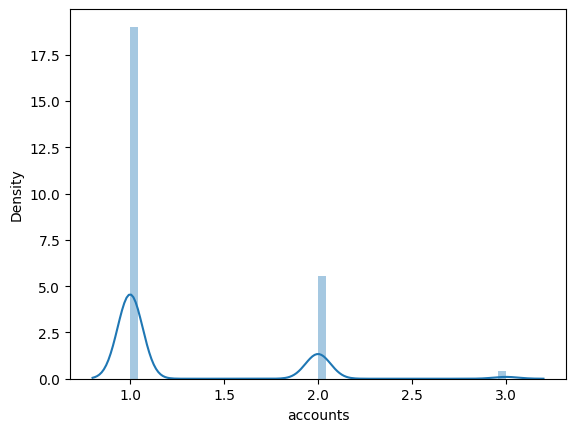

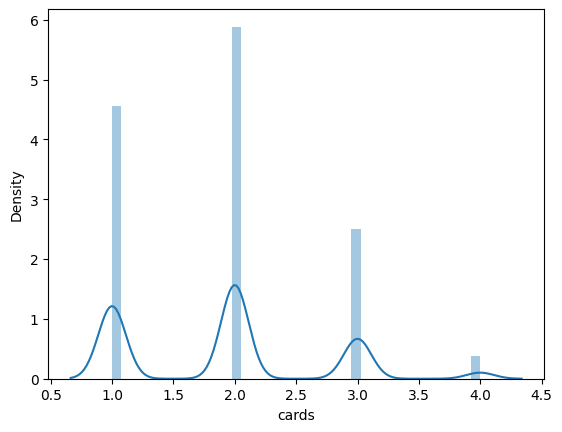

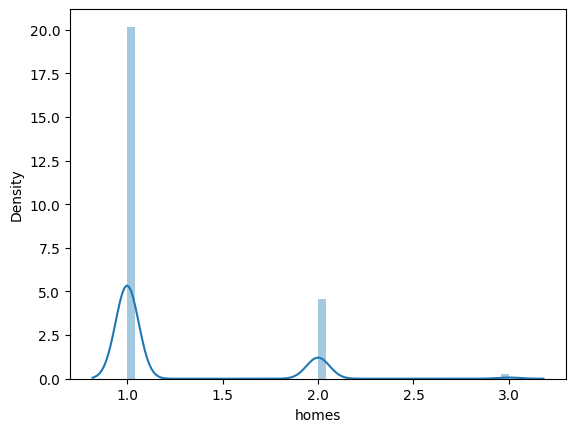

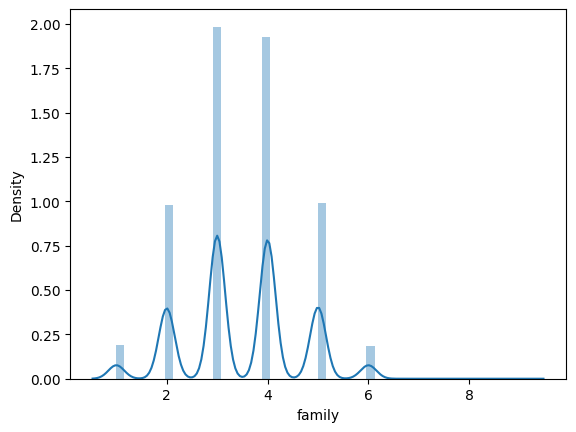

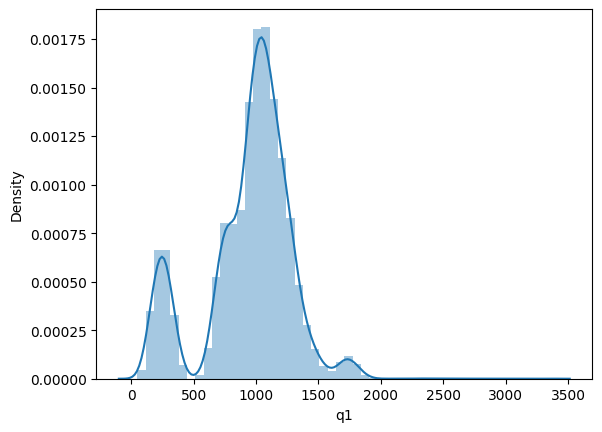

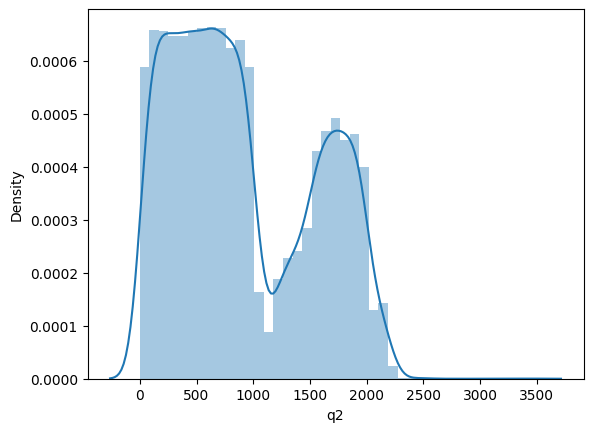

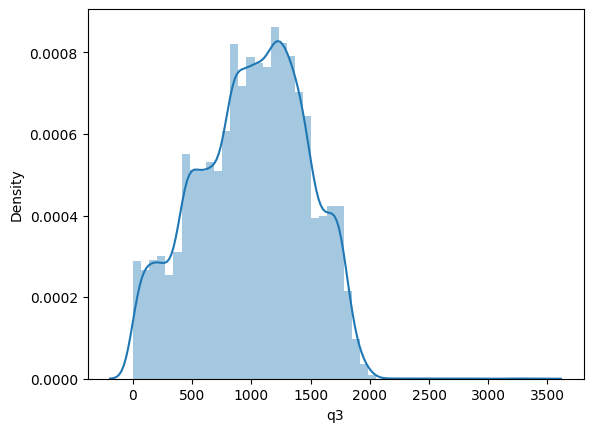

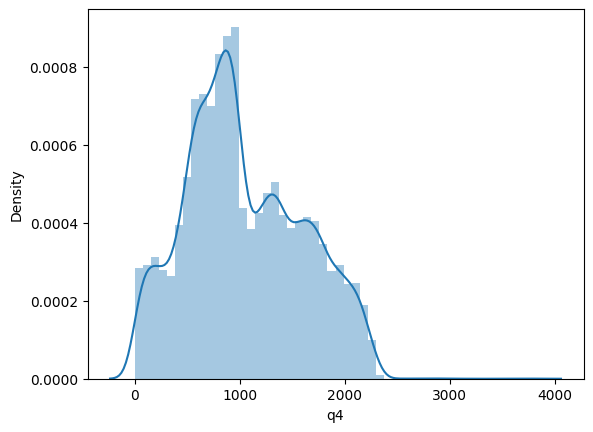

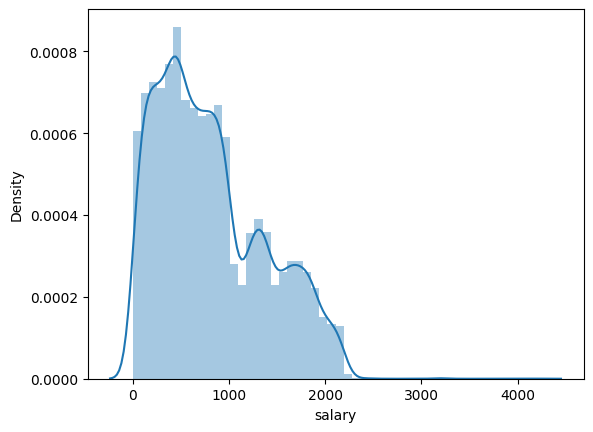

In [89]:
for colum in data.select_dtypes(np.number):
    sns.distplot(data[colum])
    plt.show()

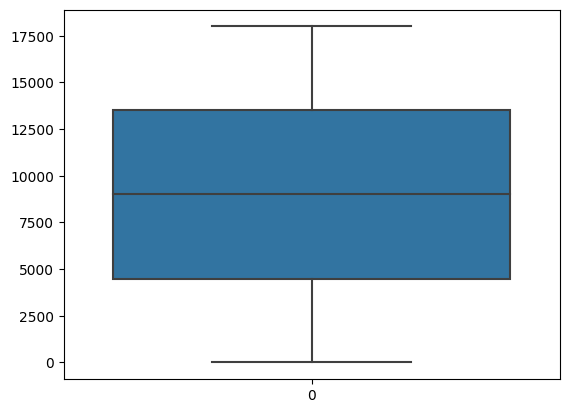

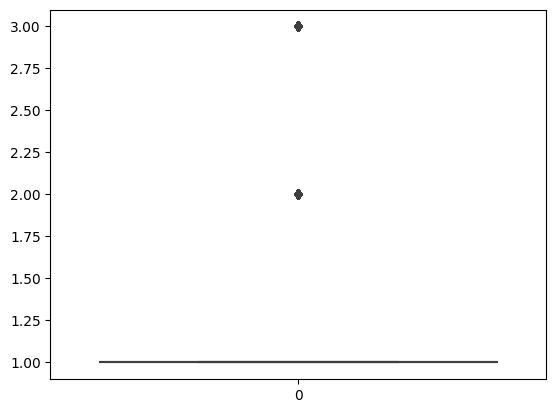

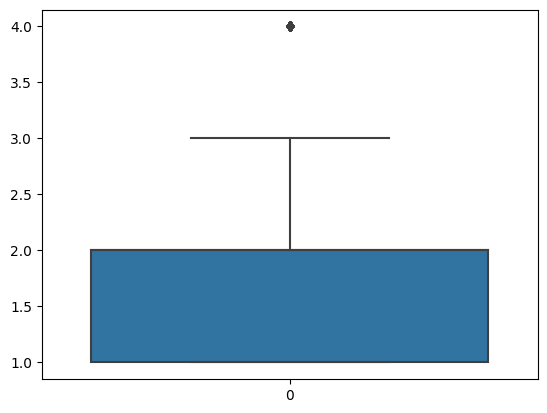

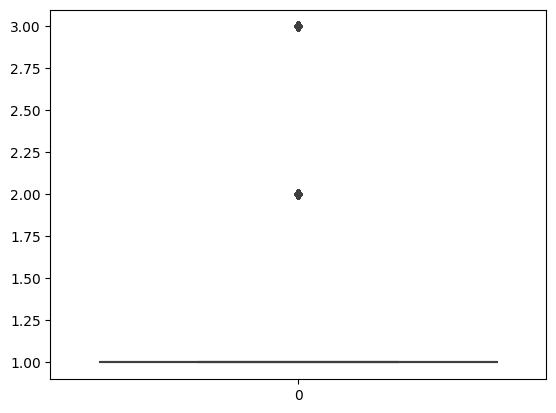

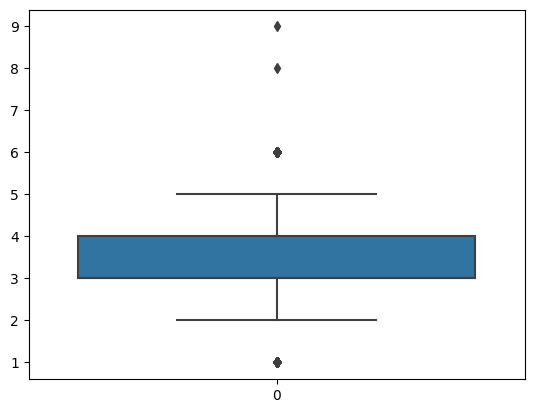

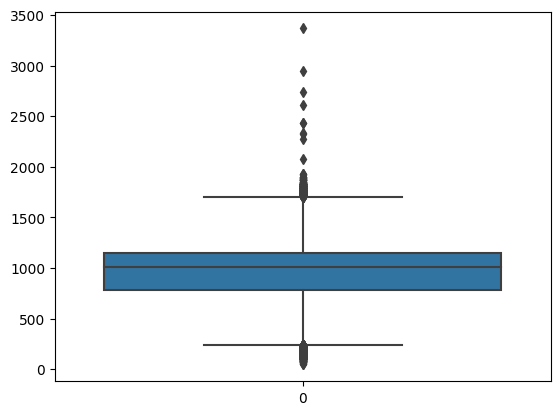

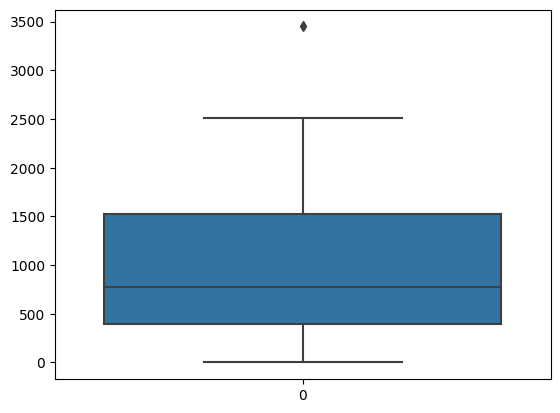

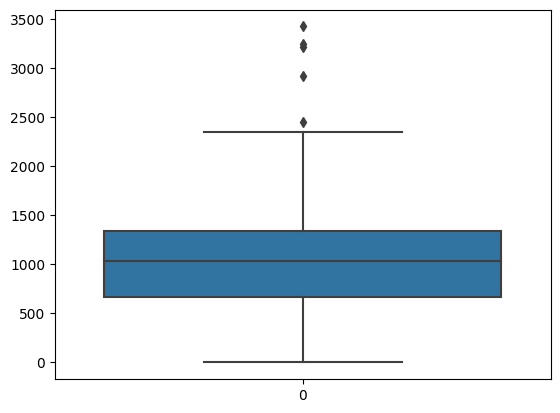

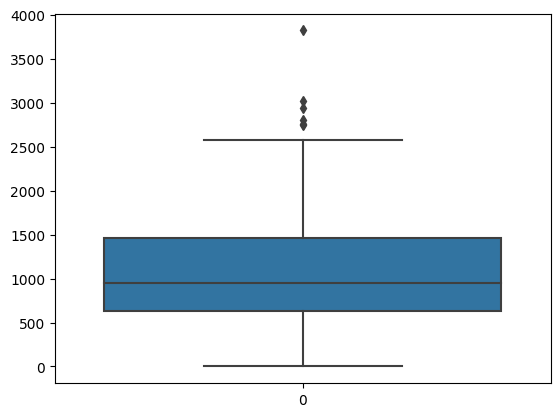

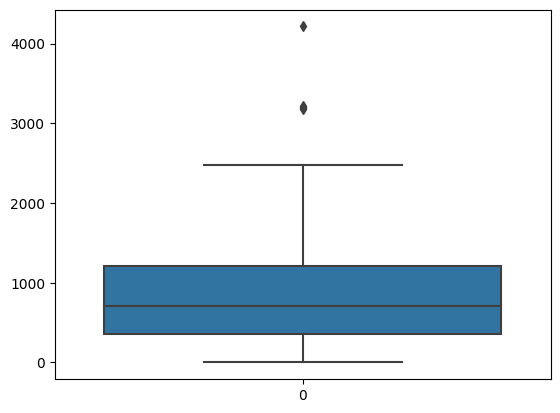

In [90]:
for colum in data.select_dtypes(np.number):
    sns.boxplot(data[colum])
    plt.show()

In [91]:
correlations_matrix = data.corr()  
correlations_matrix

,id,accounts,cards,homes,family,q1,q2,q3,q4,salary
id,1.000000,-0.004236,-0.008152,-0.002734,0.006502,0.009357,0.012216,0.011570,0.006401,-0.005901
accounts,-0.004236,1.000000,-0.001633,0.004762,0.008622,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
cards,-0.008152,-0.001633,1.000000,-0.002390,-0.003040,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
homes,-0.002734,0.004762,-0.002390,1.000000,0.005227,0.017967,0.013143,0.009758,0.007775,0.014775
family,0.006502,0.008622,-0.003040,0.005227,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
q1,0.009357,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
q2,0.012216,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
q3,0.011570,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
q4,0.006401,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298
salary,-0.005901,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


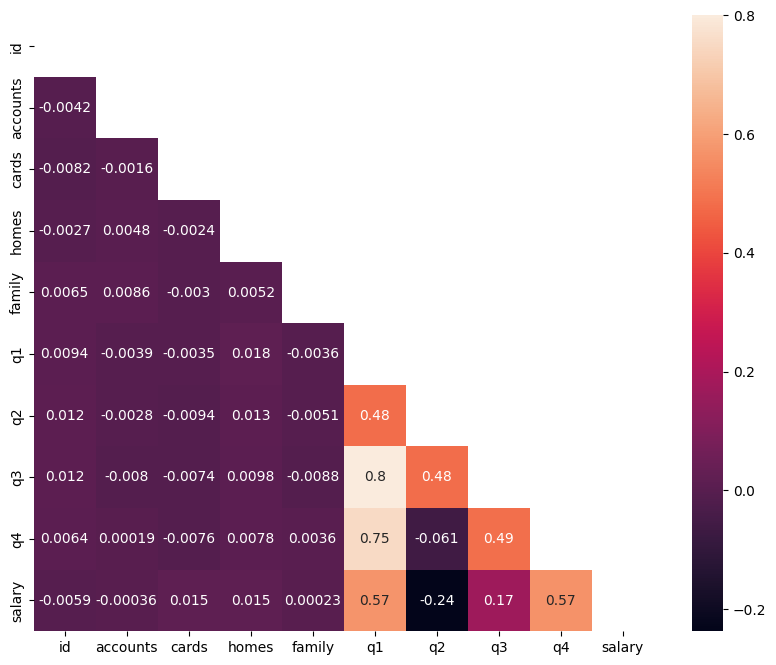

In [92]:
m = np.zeros_like(correlations_matrix)

m[np.triu_indices_from(m)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=m, annot=True)
plt.show()

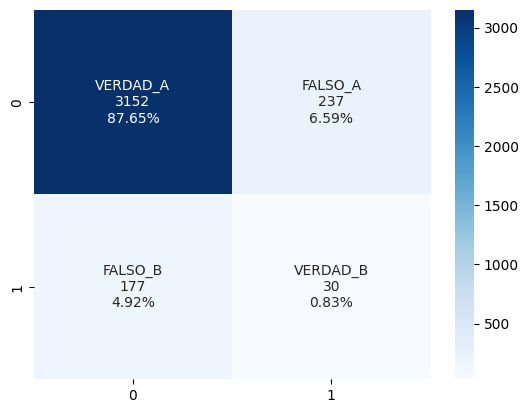

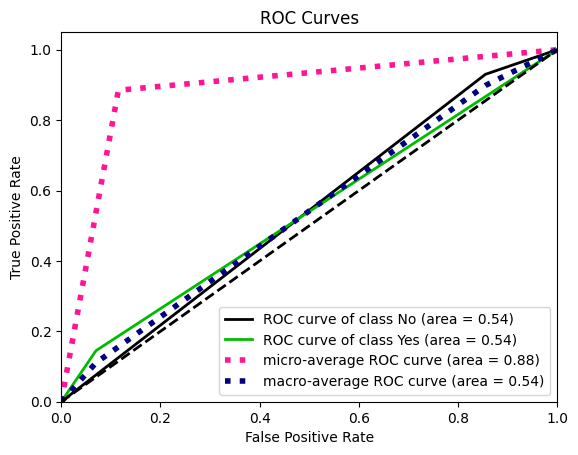

              precision    recall  f1-score   support

          No       0.95      0.93      0.94      3389
         Yes       0.11      0.14      0.13       207

    accuracy                           0.88      3596
   macro avg       0.53      0.54      0.53      3596
weighted avg       0.90      0.88      0.89      3596



In [99]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(data.drop('offer_accepted', axis=1)), data['offer_accepted'], test_size=0.2, random_state=13)
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)

predictions_tree = tree.predict(X_test)

cf_matrix = confusion_matrix(y_test, predictions_tree)
group_names = ['VERDAD_A', 'FALSO_A', 'FALSO_B', 'VERDAD_B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

y_probas = tree.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

metrics_tree = metrics.classification_report(y_test, predictions_tree)
print(metrics_tree)